<a href="https://colab.research.google.com/github/parth5757/Image_Calculator/blob/main/Gujarati_Digit_Classification_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANN

In [ ]:
#ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import glob
import time
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BASE_DIR = '/content/drive/My Drive/Gujarati_digit/'

In [ ]:
IMAGE_SIZE = 28 # Standard size for digit classification (adjust if your images are larger)
NUM_CLASSES = 10
SEED = 42

In [ ]:
print(f"Set to load images from: {BASE_DIR}")

Set to load images from: /content/drive/My Drive/Gujarati_digit/


In [ ]:
X_data = [] # To hold the image arrays (pixel data)
y_labels = [] # To hold the numerical labels (0 to 9)
start_time = time.time()
# print("\n--- Starting Image Loading ---")

In [ ]:
try:
    # Loop through each digit folder (0, 1, 2, ..., 9)
    for label in range(NUM_CLASSES):
        folder_path = os.path.join(BASE_DIR, str(label))

        if not os.path.isdir(folder_path):
            print(f"Warning: Folder for digit {label} not found at {folder_path}. Skipping.")
            continue

        # Find all image files (case-insensitive for .png and .jpg)
        image_files = glob.glob(os.path.join(folder_path, '*.png')) + glob.glob(os.path.join(folder_path, '*.jpg'))

        print(f"Found {len(image_files)} images for digit {label}.")

        for img_path in image_files:
            # Load the image as grayscale ('grayscale') and resize
            img = load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE), color_mode='grayscale')
            # Convert image to a numpy array
            img_array = img_to_array(img)

            X_data.append(img_array)
            y_labels.append(label)

except Exception as e:
    print(f"An unexpected error occurred during loading: {e}")

X_data = np.array(X_data, dtype='float32')
y_labels = np.array(y_labels, dtype='int')

end_time = time.time()

print(f"\nTotal Images Loaded: {X_data.shape[0]} in {end_time - start_time:.2f} seconds.")
if X_data.shape[0] == 0:
    raise Exception("No images were loaded. Please check your BASE_DIR path and file types.")

Found 2066 images for digit 0.
Found 2097 images for digit 1.
Found 1985 images for digit 2.
Found 2132 images for digit 3.
Found 2116 images for digit 4.
Found 2045 images for digit 5.
Found 1992 images for digit 6.
Found 1980 images for digit 7.
Found 2010 images for digit 8.
Found 2029 images for digit 9.

Total Images Loaded: 20452 in 489.88 seconds.


In [ ]:
X_data = X_data / 255.0

In [ ]:
y_categorical = to_categorical(y_labels, num_classes=NUM_CLASSES)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_categorical, test_size=0.2, random_state=SEED, stratify=y_labels
)

print(f"Training Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")

Training Samples: 16361
Testing Samples: 4091


In [ ]:
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)
# print(X_train)
print(y_train[16279])
print(f"Raw y_labels sample: {y_labels[20451]}")

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Raw y_labels sample: 9


In [ ]:
def create_ann_model(input_shape):
    """Defines a simple Multilayer Perceptron (ANN) model."""
    model = Sequential([
        # 1. Flatten the 28x28x1 image matrix into a 1024-element vector
        Flatten(input_shape=input_shape),

        # 2. First Hidden Layer (Dense)
        Dense(512, activation='relu'),
        Dropout(0.3),

        # 3. Second Hidden Layer (Dense)
        Dense(256, activation='relu'),
        Dropout(0.3),

        # 4. Output Layer
        Dense(NUM_CLASSES, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, 1)
ann_model = create_ann_model(input_shape)

print("ANN Model Summary")
ann_model.summary()

ANN Model Summary


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("\n--- Starting Model Training ---")
history = ann_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)


--- Starting Model Training ---
Epoch 1/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.2462 - loss: 2.1490 - val_accuracy: 0.5785 - val_loss: 1.2999
Epoch 2/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5202 - loss: 1.3820 - val_accuracy: 0.5767 - val_loss: 1.3174
Epoch 3/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5654 - loss: 1.2533 - val_accuracy: 0.6341 - val_loss: 1.0282
Epoch 4/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5890 - loss: 1.2075 - val_accuracy: 0.6549 - val_loss: 0.9997
Epoch 5/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6151 - loss: 1.1105 - val_accuracy: 0.7440 - val_loss: 0.8283
Epoch 6/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6429 - loss: 1.0393 - val_accuracy: 0.6891 - val_loss: 0.8684
Epoch 7/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6522 - loss: 1.0099 - val_accuracy: 0.7502 - val_loss: 0.7826
Epoch 8/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy:

In [ ]:
print("Evaluating Final Test Accuracy")
loss, accuracy = ann_model.evaluate(X_test, y_test, verbose=0)

print(f"\nFinal ANN Test Loss: {loss:.4f}")
print(f"Final ANN Test Accuracy (Baseline): {accuracy * 100:.2f}%")

print("Next Step: Implement CNN to Surpass Baseline")

Evaluating Final Test Accuracy

Final ANN Test Loss: 0.5731
Final ANN Test Accuracy (Baseline): 81.59%
Next Step: Implement CNN to Surpass Baseline


In [ ]:
loss, accuracy = ann_model.evaluate(X_test, y_test, verbose=0)
print(f"Final Test Accuracy: {accuracy * 100:.2f}%")

Final Test Accuracy: 81.59%


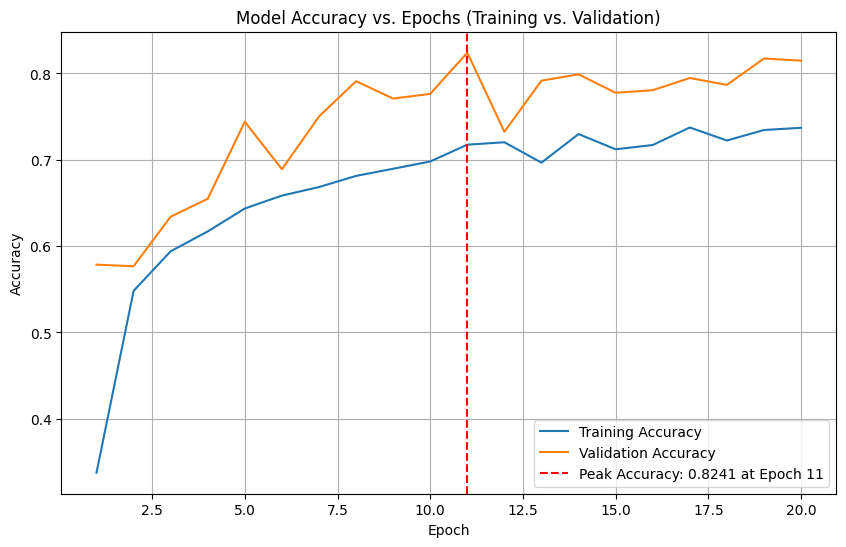

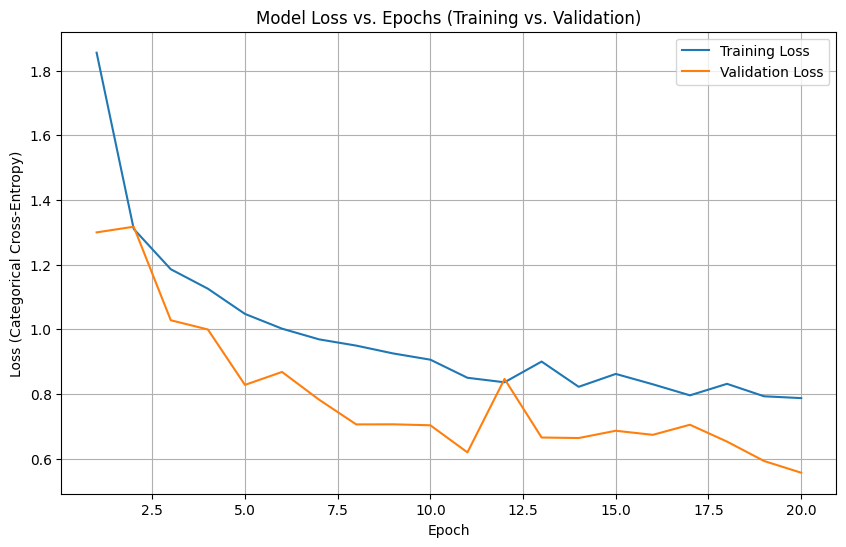

In [ ]:

hist_df = pd.DataFrame(history.history)
epochs = hist_df.index.to_numpy() + 1
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df['accuracy'], label='Training Accuracy')
plt.plot(epochs, hist_df['val_accuracy'], label='Validation Accuracy')

best_epoch_ann = hist_df['val_accuracy'].idxmax() + 1
plt.axvline(x=best_epoch_ann, color='r', linestyle='--', label=f'Peak Accuracy: {hist_df["val_accuracy"].max():.4f} at Epoch {best_epoch_ann}')

plt.title('Model Accuracy vs. Epochs (Training vs. Validation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# LOSS FUNCTION

plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df['loss'], label='Training Loss')
plt.plot(epochs, hist_df['val_loss'], label='Validation Loss')

plt.title('Model Loss vs. Epochs (Training vs. Validation)')
plt.xlabel('Epoch')
plt.ylabel('Loss (Categorical Cross-Entropy)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def predict_digit_ann(image_path, model, image_size):
    """
    Predicts the digit in a single image using the trained ANN model.

    Args:
        image_path (str): The path to the image file.
        model (tf.keras.Model): The trained ANN model.
        image_size (int): The target size for the image (width and height).

    Returns:
        int: The predicted digit (0-9).
        np.ndarray: The prediction probabilities for each class.
    """
    try:
        # Load and preprocess the image
        img = load_img(image_path, target_size=(image_size, image_size), color_mode='grayscale')
        img_array = img_to_array(img)
        img_array = img_array / 255.0  # Normalize

        # The model expects a batch of images, so we add an extra dimension
        img_array = np.expand_dims(img_array, axis=0)

        # Make a prediction
        predictions = model.predict(img_array)
        predicted_digit = np.argmax(predictions, axis=1)[0]

        return predicted_digit, predictions[0]

    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
        return None, None
    except Exception as e:
        print(f"An error occurred during prediction: {e}")
        return None, None
predict_digit_ann()

In [ ]:
# Assuming Test1.png is in the current directory or accessible path
image_path = 'Test3.jpg'
predicted_digit, probabilities = predict_digit_ann(image_path, ann_model, IMAGE_SIZE)

if predicted_digit is not None:
    print(f"Predicted digit for {image_path}: {predicted_digit}")
    print(f"Prediction probabilities: {probabilities}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Predicted digit for Test3.jpg: 2
Prediction probabilities: [5.0144996e-11 1.8480138e-07 9.9988008e-01 5.8142040e-11 3.1536995e-09
 7.7588593e-05 2.7008798e-05 1.5114166e-05 2.2628251e-08 1.3872777e-11]
